In [1]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [2]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.backends.cudnn as cudnn
import torch.optim as optim

import timm

import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

import os
import argparse

In [3]:
from torchvision.datasets import CIFAR10
from torch.utils.data import random_split

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load Dataset

In [7]:
dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)

Files already downloaded and verified


# Models

In [8]:
print(timm.list_models())

['bat_resnext26ts', 'beit_base_patch16_224', 'beit_base_patch16_384', 'beit_large_patch16_224', 'beit_large_patch16_384', 'beit_large_patch16_512', 'beitv2_base_patch16_224', 'beitv2_large_patch16_224', 'botnet26t_256', 'botnet50ts_256', 'caformer_b36', 'caformer_m36', 'caformer_s18', 'caformer_s36', 'cait_m36_384', 'cait_m48_448', 'cait_s24_224', 'cait_s24_384', 'cait_s36_384', 'cait_xs24_384', 'cait_xxs24_224', 'cait_xxs24_384', 'cait_xxs36_224', 'cait_xxs36_384', 'coat_lite_medium', 'coat_lite_medium_384', 'coat_lite_mini', 'coat_lite_small', 'coat_lite_tiny', 'coat_mini', 'coat_small', 'coat_tiny', 'coatnet_0_224', 'coatnet_0_rw_224', 'coatnet_1_224', 'coatnet_1_rw_224', 'coatnet_2_224', 'coatnet_2_rw_224', 'coatnet_3_224', 'coatnet_3_rw_224', 'coatnet_4_224', 'coatnet_5_224', 'coatnet_bn_0_rw_224', 'coatnet_nano_cc_224', 'coatnet_nano_rw_224', 'coatnet_pico_rw_224', 'coatnet_rmlp_0_rw_224', 'coatnet_rmlp_1_rw2_224', 'coatnet_rmlp_1_rw_224', 'coatnet_rmlp_2_rw_224', 'coatnet_rmlp_2

In [9]:
models = [
    ('ResNet18', timm.create_model('resnet18', pretrained=True)),
    #('ResNet50', timm.create_model('resnet50', pretrained=True)),
    #('EfficientNet', timm.create_model('efficientnet_b0', pretrained=True)),
    #('ViT', timm.create_model('vit_base_patch16_224', pretrained=True)),
    #('VGGNet', timm.create_model('vgg11', pretrained=True)),
    #('GoogLeNet', timm.create_model('googlenet', pretrained=True)), не работает
    #('DenseNet', timm.create_model('densenet121', pretrained=True))
]

# googlenet = torchvision.models.GoogLeNet(pretrained=True)
# models.append(('GoogLeNet', googlenet)) не работает

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

# Loss functions

In [10]:
criterion = nn.CrossEntropyLoss()
# criterion = nn.MSELoss()
# criterion = nn.L1Loss()
# criterion = nn.BCELoss()
# criterion = nn.BCEWithLogitsLoss()
# criterion = nn.NLLLoss()
# criterion = nn.PoissonNLLLoss()
# criterion = nn.KLDivLoss()

In [19]:
def train(model, train_loader, criterion, optimizer, device, num_epochs):
    model.to(device)
    model.train()
    losses, epochs, accuracies = [], [], []
    for epoch in range(num_epochs):
        # Training part
        running_loss = 0.0
        correct, total = 0, 0
        cool_progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}. Training {model.__class__.__name__}', unit='batch')
        for inputs, labels in cool_progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            cool_progress_bar.set_postfix(loss=running_loss / len(train_loader.dataset), acc=correct / total)
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        losses.append(epoch_loss)
        accuracies.append(epoch_acc)
        epochs.append(epoch + 1)
    return losses, epochs, accuracies


def validate(model, train_loader, criterion, optimizer, device, num_epochs):
    model.to(device)
    model.eval()
    losses, epochs, accuracies = [], [], []
    with torch.no_grad():

      for epoch in range(num_epochs):
          running_loss = 0.0
          correct, total = 0, 0
          cool_progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}. Validating {model.__class__.__name__}', unit='batch')
          for inputs, labels in cool_progress_bar:
              inputs, labels = inputs.to(device), labels.to(device)
              outputs = model(inputs)
              loss = criterion(outputs, labels)
              running_loss += loss.item() * inputs.size(0)
              _, predicted = torch.max(outputs, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()
              cool_progress_bar.set_postfix(loss=running_loss / len(train_loader.dataset), acc=correct / total)
          epoch_loss = running_loss / len(train_loader.dataset)
          epoch_acc = correct / total
          losses.append(epoch_loss)
          accuracies.append(epoch_acc)
          epochs.append(epoch + 1)
    return losses, epochs, accuracies

In [24]:
num_epochs = 2
lr = 0.0001
#weight_decay = 0.0001 # пока не использовалось, потом добавить в optimizer

In [25]:
results = {}
val_results = {}
for model_name, model in models:
    optimizer = torch.optim.Adam(model.parameters(), lr)
    losses, epochs, accuracies = train(model, train_loader, criterion, optimizer, device, num_epochs)
    results[model_name] = {'losses': losses, 'epochs': epochs, 'accuracies': accuracies}

    val_losses, val_epochs, val_accuracies = validate(model, train_loader, criterion, optimizer, device, num_epochs)
    val_results[model_name] = {'losses': val_losses, 'epochs': val_epochs, 'accuracies': val_accuracies}


Epoch 2/2. Validating ResNet: 100%|██████████| 625/625 [02:04<00:00,  5.03batch/s, acc=0.997, loss=0.0223]


In [26]:
print(results)
print(val_results)

{'ResNet18': {'losses': [0.10848420800715684, 0.06689351639151574], 'epochs': [1, 2], 'accuracies': [0.963825, 0.980375]}}
{'ResNet18': {'losses': [0.022319077399745584, 0.022319077271968125], 'epochs': [1, 2], 'accuracies': [0.996825, 0.996825]}}


In [27]:
os.makedirs('results', exist_ok=True)
for model_name, data in results.items():
    np.savez(f'results/{model_name}_results.npz', losses=data['losses'], epochs=data['epochs'], accuracies=data['accuracies'])

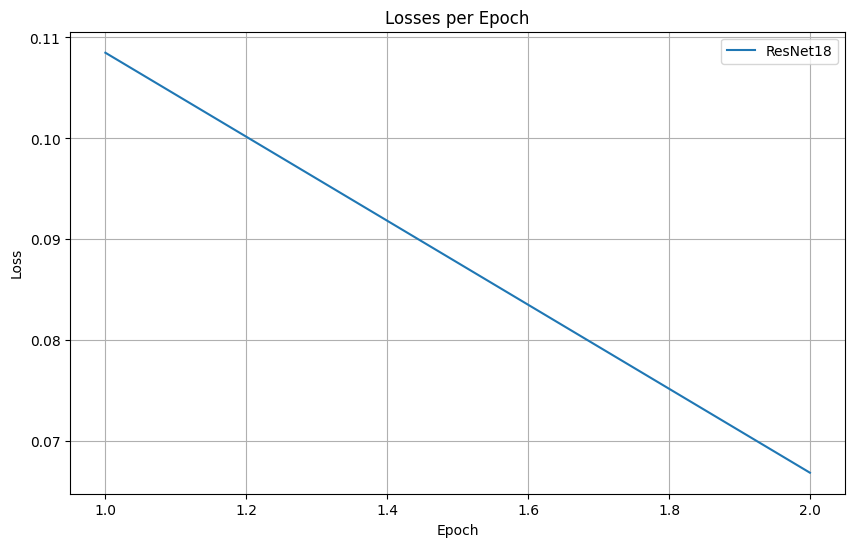

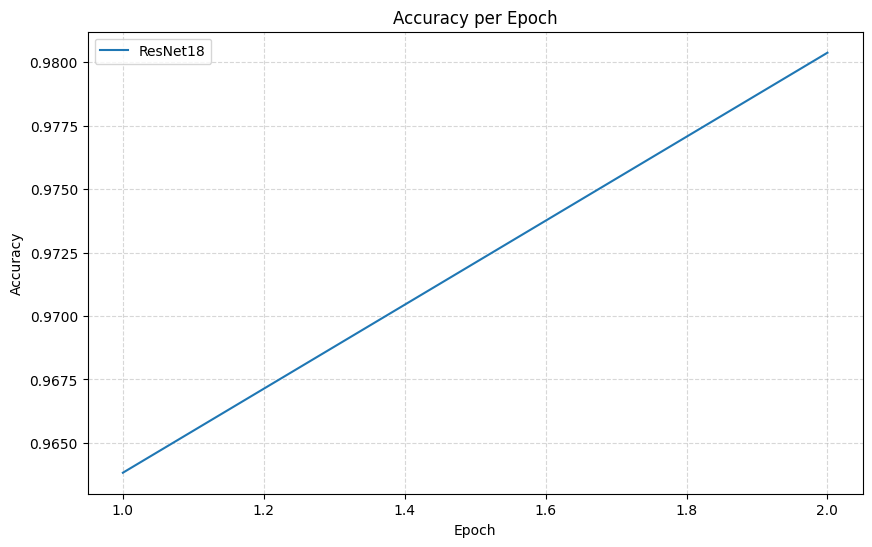

In [29]:
plt.figure(figsize=(10, 6))

for model_name, data in results.items():
    plt.plot(data['epochs'], data['losses'], label=model_name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses per Epoch')
plt.legend()
plt.grid(True)
plt.show()



